# IDS Assignment Part 1 - <font color="red"><h7>Deadline: 18/12/2022 23:59</h7></font>
This is the first part of the assignments in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. This is the _only_ file that is required. A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. Sourav Kulkarni(417735)
    
    2. 
    
    3.

For those using Jupyter Notebook in your local environments, please install the following library in your environment:
```pip install umap-learn==0.5.3```

In [1]:
#your imports (only use libraries provided in the environment)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats
from sklearn.linear_model import LinearRegression, LogisticRegression

# Pricing your AirBnB

You finally made it! Working as a data scientist at an established process mining company in New York, you earned so much money that you can buy a flat for yourself. You decide to buy a 2-room apartment in Manhattan. Congratulations!

Currently, you are still living in your rental apartment and are tied to a long-running rental contract. You can only use the apartment in 5 years from now. Therefore, you want to use the apartment as an AirBnB in the meantime, generating some consistent income. 


You have no clue how you should price your AirBnB per night (you are living in New York, so you never needed to book an AirBnB). You decide to leverage your unique skill set and perform a data-driven, informed decision. You collect all the data you can get your hands on by traversing all New York apartments. The retrieved data set **AirBnB_original.csv** is your starting point for investigation.

## Question 1: Exploring the Data Set

As with every data set, you first want to know what you are dealing with. You perform some exploratory data analysis and clean the data along the way.

Show a few data points contained in the data set. Include all attributes.

In [4]:
# Your answer goes here
#read data
dataset_original = pd.read_csv('AirBnB_original.csv')

print(f"Dataset shape: {dataset_original.shape[0]} rows, {dataset_original.shape[1]} columns")

#show first 10 values
print("Sample Entries:")
dataset_original.head(5)


Dataset shape: 72709 rows, 19 columns
Sample Entries:


,id,host id,neighborhood group,neighborhood,lat,long,country,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
0,1001254,80014485718,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,193.0,7.0,9.0,4.0,6.0,1
1,1002102,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,28.0,7.0,45.0,4.0,2.0,2
2,1002403,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,0,flexible,Private room,2005.0,620,124.0,3.0,0.0,5.0,1.0,1
3,1002755,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,0,moderate,Entire home/apt,2005.0,368,74.0,7.0,270.0,4.0,1.0,2
4,1003689,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,41.0,7.0,9.0,3.0,1.0,1


### Basic Cleaning

First, you have to remove NaN entries across the data set such that we only keep rows without any NaN value. How many rows did you remove?

In [5]:
original_data_length = dataset_original.shape[0]
no_nan_dataset = dataset_original.dropna(axis = 0, how = "any")
no_nan_data_length = no_nan_dataset.shape[0]

print(f"Original Data Rows = {original_data_length}")
print(f"No Nan Data Rows = {no_nan_data_length}")
print(f"Removed Rows with NaN = {original_data_length-no_nan_data_length}")


Original Data Rows = 72709
No Nan Data Rows = 71232
Removed Rows with NaN = 1477


Since duplicated entries are misleading, we want to remove duplicate flats (identified by their id), such that we only keep them once and create a new dataset. How many duplicates are removed?

In [6]:
unique_val_dataset = dataset_original.drop_duplicates(
    subset = ['id'], keep = 'last').reset_index(drop = True)
unique_val_dataset_length = unique_val_dataset.shape[0]

print(f"Unique Rows = {unique_val_dataset_length}")
print(f"Removed Rows with Duplicates = {original_data_length-unique_val_dataset_length}")

Unique Rows = 72309
Removed Rows with Duplicates = 400


From now on, you work with the dataset **AirBnB_cleaned.csv**.

To get a feeling for nightly prices in New York, you take a look at the price attribute. Calculate the average price, the first and third quantiles, and the standard deviation.

In [7]:
dataset_cleaned = pd.read_csv('AirBnB_cleaned.csv')

dataset_cleaned['price'].describe(include='all')


count    70842.000000
mean       625.463680
std        331.236241
min         50.000000
25%        340.000000
50%        625.000000
75%        913.000000
max       1200.000000
Name: price, dtype: float64

You want to get a more visual picture of the price range. Use a histogram and boxplot to show the distribution of prices on the entire dataset.

Text(-3.6805555555555554, 0.5, 'Price')

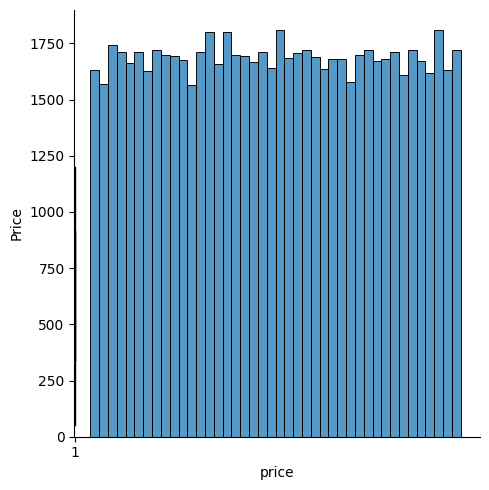

In [11]:
# Your answer goes here
sns.displot(data=dataset_cleaned.price, kind="hist")

Text(0, 0.5, 'Price')

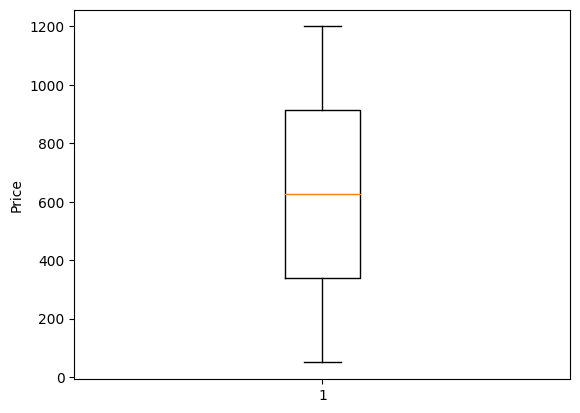

In [12]:
plt.boxplot(dataset_cleaned.price)
plt.ylabel("Price")

### Exploring Price Relationships

To inform our pricing decision, we want to investigate some differentiating factors for pricing apartments.

Since you have an overview of the prices and their distribution, you want to investigate which features of your dataset you might use to make your pricing decision. To do so, discuss each feature of the dataset and already rule out features that will definitely not impact the pricing decision. Below you can find a brief description of each feature: 

- id: Unique identifier for an apartment
- host id: Identifier of the host offering a certain apartment
- neighborhood group: Name of a neighborhood group in which an apartment is located
- neighborhood: More fine-grained view on neighborhoods than neighborhood group
- lat: Latitude coordinate of an apartment
- long: Longitude coordinate of an apartment
- country: The country in which an apartment is located
- country code: Code of the country in which an apartment is located
- instant bookable: Boolean values if an apartment is instantly bookable
- cancellation policy: Policy for cancellation of booking
- room type: Type of apartment/room
- construction year: Year of construction of apartment
- price: Price for renting an apartment
- service fee: Fee of service
- minimum nights: Number of minimum nights to rent an apartment
- number of reviews: Number of reviews for an apartment
- review rate number:  Review rate for an apartment (1 to 5)
- calculated host listings count: Number of listings a host has
- number rooms: Number of rooms in an apartment

In [13]:
# Your answer goes here

"""
Features that definitely won't matter:
1. ID
2. Host ID
3. Country
4. Country Code

Features that would matter:
1. Neighborhood Group
2. Neighborhood
3. Latitude
4. Longitude
5. Instant bookable
6. Cancellation policy
7. Room type
8. Construction Year
9. Service Fee
10. Review Rate Number
11. Number Rooms

Features that may or may not matter
1. Number of reviews
2. Calculated Host listing count
"""



"\nFeatures that definitely won't matter:\n1. ID\n2. Host ID\n3. Country\n4. Country Code\n\nFeatures that would matter:\n1. Neighborhood Group\n2. Neighborhood\n3. Latitude\n4. Longitude\n5. Instant bookable\n6. Cancellation policy\n7. Room type\n8. Construction Year\n9. Service Fee\n10. Review Rate Number\n11. Number Rooms\n\nFeatures that may or may not matter\n1. Number of reviews\n2. Calculated Host listing count\n"

_Answer:_ 

- The `id` and the `host id` features are just arbitraty assignments and not related to the price in any way.  
- As all our records are related to New York City, the `country` and `country code` features are also useless.
- `neighborhood`, `neighborhood group`, `latitude` and `longitude` are useful as the pricing may change according to the locality of the apartment
- If the apartment is `instant bookable` I would assume that it would be a bit more costly
- Aparments providing a good `cancellation policy` may charge higher for the booking
- Pricing may vary according to `room type`. Better rooms, higher price.
- `construction year` also matters as older rooms might be cheaper than newer rooms.
- Higher `service fee` means higher price
- Rooms with higher `review rate number` indicate better rooms which would lead to higher prices
- `number rooms` would be directly proportional to price
- I think `number of reviews` would have little to no effect on the price. The quality of the review matters more than the quantity of review.
- I don't think `calculated host listing count` would matter in price. If someone has listed a single apartment and someone else has listed 10, it would not be easy to guess whose apartments cost more.

### Univariate Analysis

In the following, you want to analyze which features influence the price. You do this univariately, i.e., look at the relationship between one feature and the price individually. No matter which features you concluded to be useful in the last task, **you will consider the following seven features: service fee, minimum nights, neighborhood group, room type, cancellation policy, construction year, and the number of rooms.**

First, we look closely at the relationship between price and service fee. To do so, create a joint plot for these two attributes. What is your finding? Is this a helpful feature for our pricing decision?

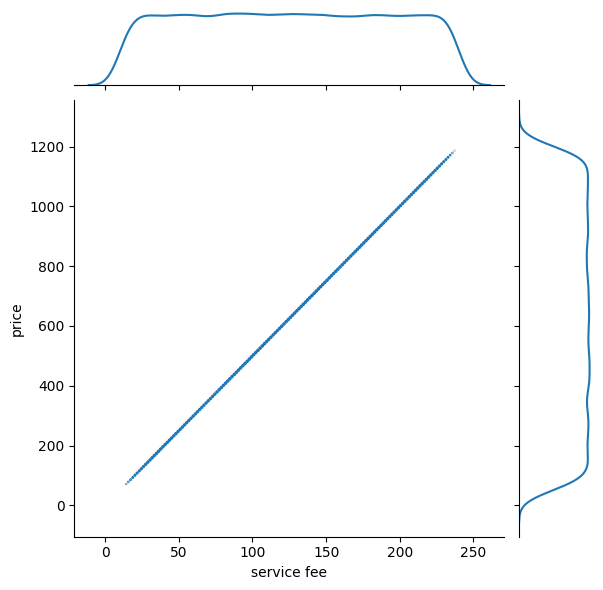

In [14]:
# Your answer goes here
sns.jointplot(data=dataset_cleaned, x="service fee", y='price', kind='kde')


_Answer:_

There is a strong possibility that the service fee is derived as a percentage of the price itself, hence the tight positive correlation.

Next, we are interested in the relationship between the number of minimum nights and the price. To analyze it, create a joint plot with a regression. Describe your observation.

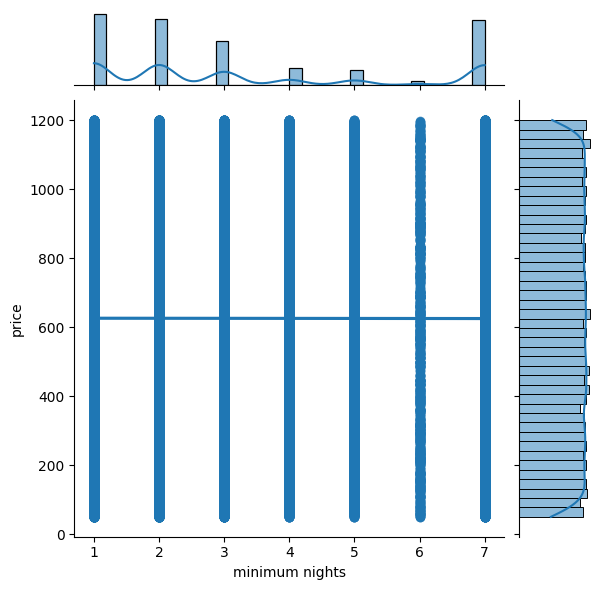

In [15]:
# Your answer goes here
sns.jointplot(data=dataset_cleaned, x='minimum nights', y="price", kind='reg')


_Answer:_

We see that the regression line is almost horizontal. So there seems to be no relation between the minimum number of nights and the price of the apartment.


To further investigate the pricing decision, you look at the remaining five features: neighborhood group, room type, cancellation policy, construction year, and the number of rooms.
To get an overview, you decide to create box plots (including the mean) for each of these features to visualize their influence on the price. Describe your findings. Which values of the features influence the price?

<AxesSubplot: xlabel='neighborhood group', ylabel='price'>

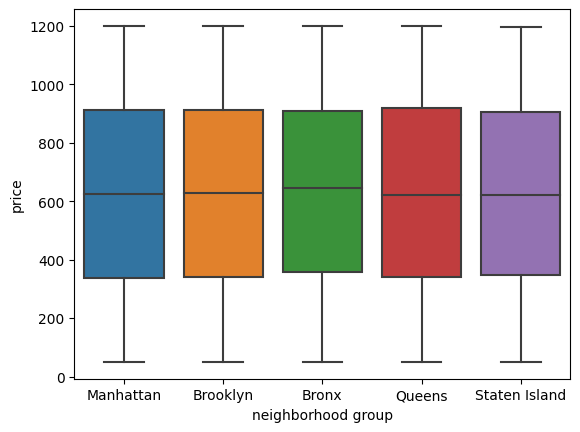

In [17]:
# Your answer goes here
sns.boxplot(x="neighborhood group", y="price", data=dataset_cleaned)


<AxesSubplot: xlabel='cancellation policy', ylabel='price'>

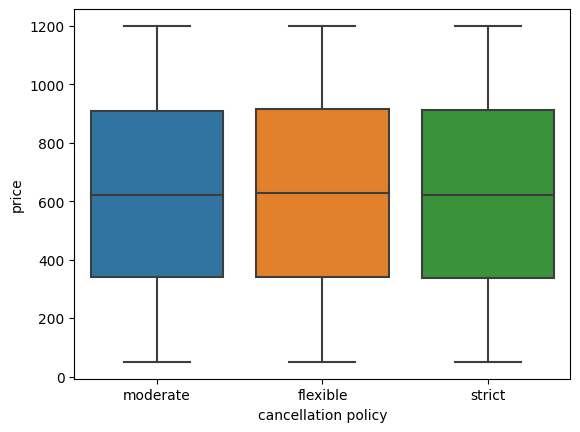

In [18]:
sns.boxplot(x="cancellation policy", y="price", data=dataset_cleaned)

<AxesSubplot: xlabel='room type', ylabel='price'>

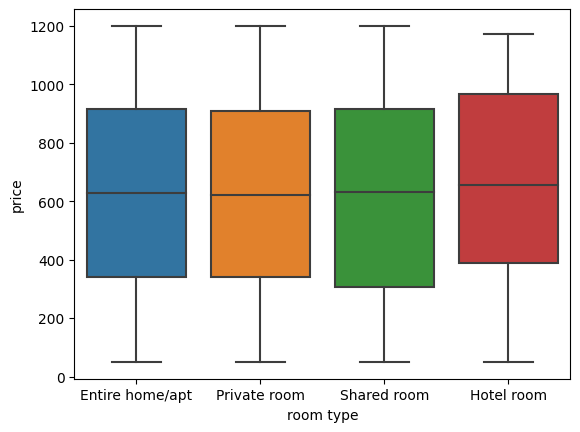

In [19]:
sns.boxplot(x="room type", y="price", data=dataset_cleaned)

<AxesSubplot: xlabel='construction year', ylabel='price'>

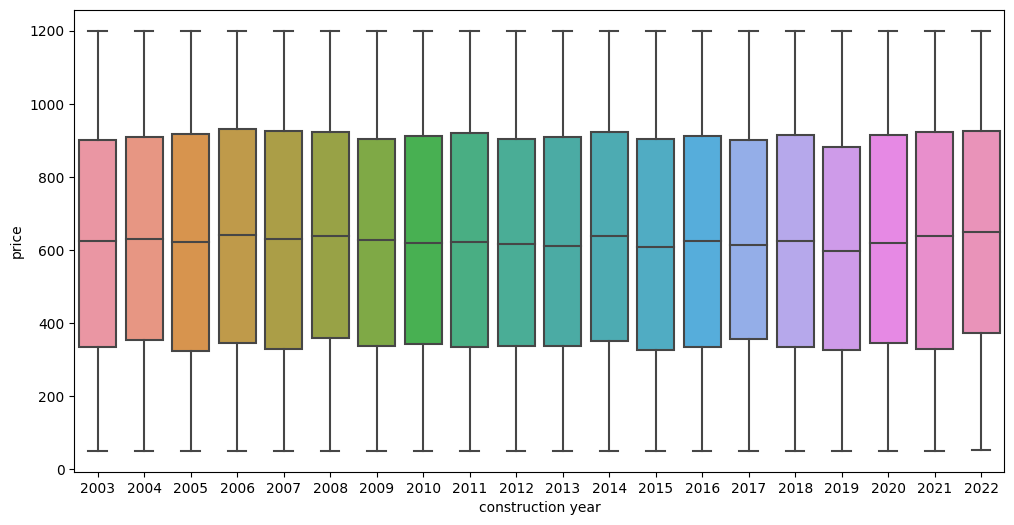

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x="construction year", y="price", data=dataset_cleaned)

<AxesSubplot: xlabel='number rooms', ylabel='price'>

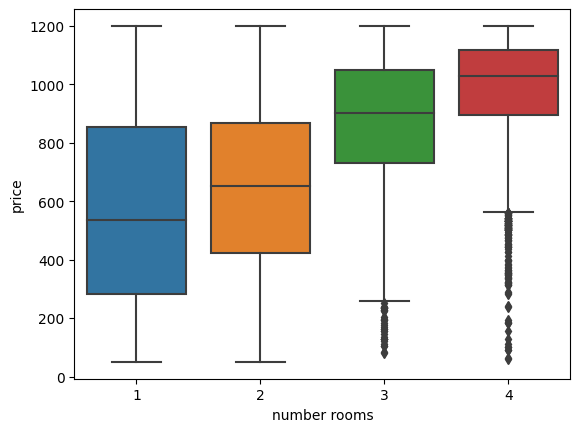

In [23]:
sns.boxplot(x="number rooms", y="price", data=dataset_cleaned)

_Answer:_

The price varies only slightly with change in neighborhood, type of the rooms, cancellation policy and construction year. 

On the other hand, there is noticable positive correlation between number of rooms and price, which is as expected.

### Multivariate Analysis

As the univariate analysis of price relationships provided only limited insights, you decide to visualize some multivariate investigations of the price. **No matter what you concluded in the last section, you will use the features construction year, number of rooms, cancellation policy, room type, and neighborhood group in the multivariate analysis.**
For each pair of features, create a grouped boxplot (using the hue argument) and investigate whether the two features together allow for an explanation of price differences. In the end, conclude which combination of features should be used to make your pricing decision.

#### Multivariate Analysis for Neighborhood Group

<AxesSubplot: xlabel='construction year', ylabel='price'>

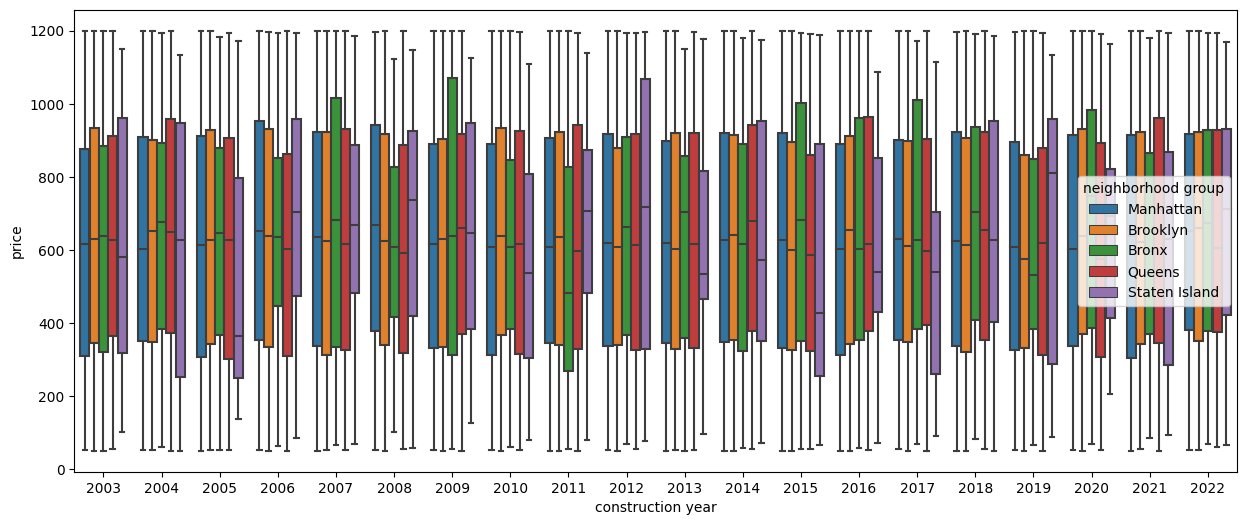

In [51]:
# Your answer goes here
plt.figure(figsize=(15,6))
sns.boxplot(data=dataset_cleaned, x="construction year", y="price", hue = "neighborhood group")


<AxesSubplot: xlabel='number rooms', ylabel='price'>

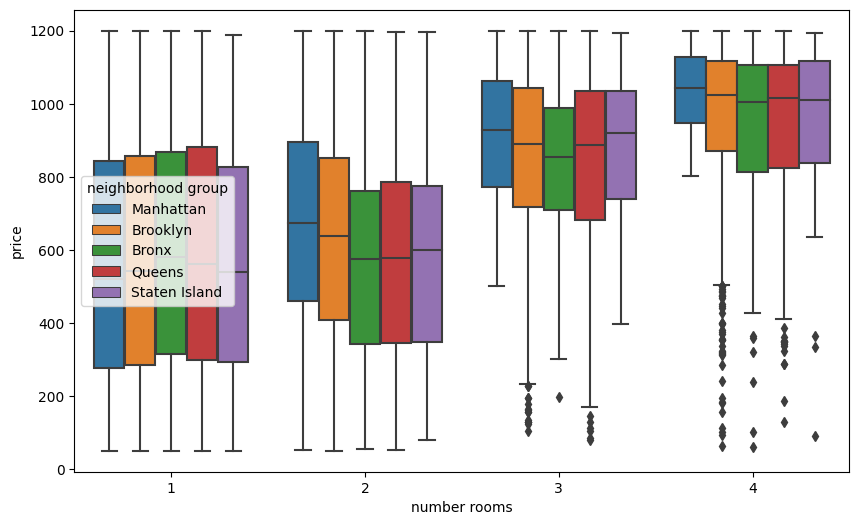

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset_cleaned, x="number rooms", y="price", hue = "neighborhood group")

<AxesSubplot: xlabel='cancellation policy', ylabel='price'>

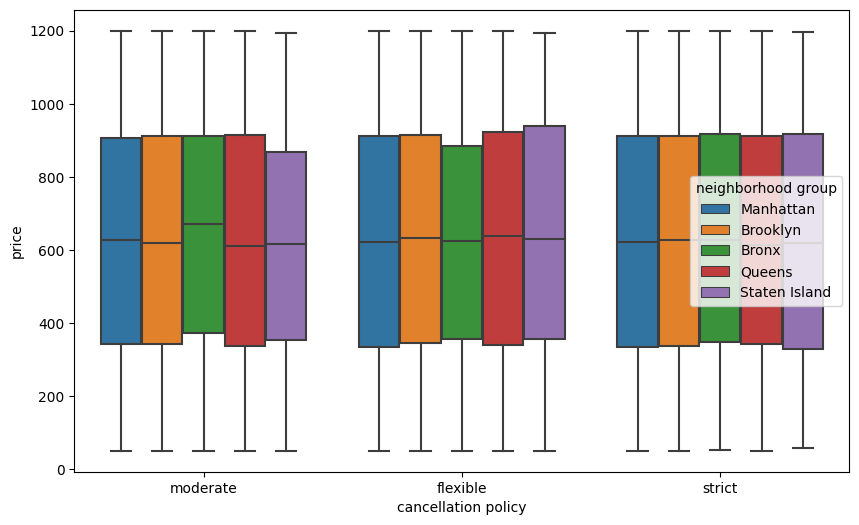

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset_cleaned, x="cancellation policy", y="price", hue = "neighborhood group")

<AxesSubplot: xlabel='room type', ylabel='price'>

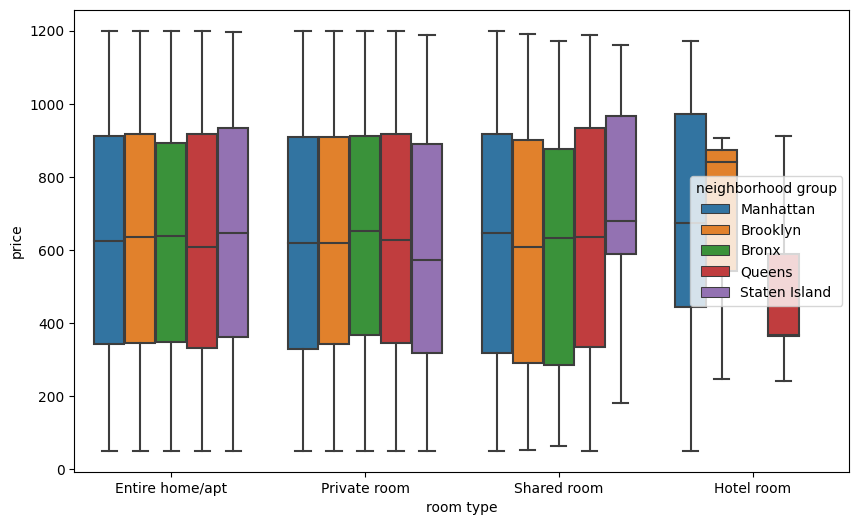

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset_cleaned, x="room type", y="price", hue = "neighborhood group")

_Answer:_
It seems that out of the above 4 pairings, `number rooms` goes very well with `neighborhood group`


#### Multivariate Analysis for Room Type

<AxesSubplot: xlabel='construction year', ylabel='price'>

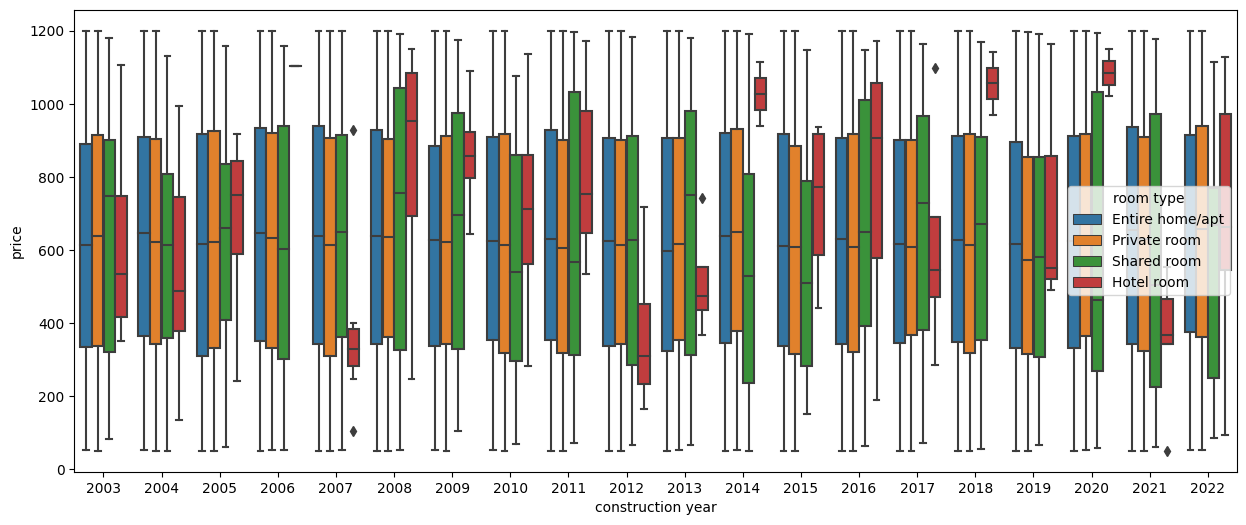

In [53]:
# Your answer goes here
plt.figure(figsize=(15,6))
sns.boxplot(data=dataset_cleaned, x="construction year", y="price", hue = "room type")

<AxesSubplot: xlabel='number rooms', ylabel='price'>

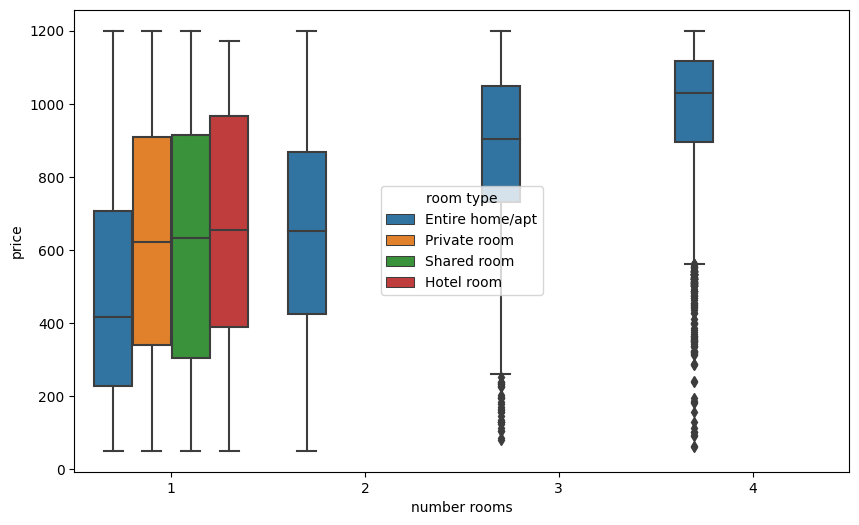

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset_cleaned, x="number rooms", y="price", hue = "room type")

<AxesSubplot: xlabel='cancellation policy', ylabel='price'>

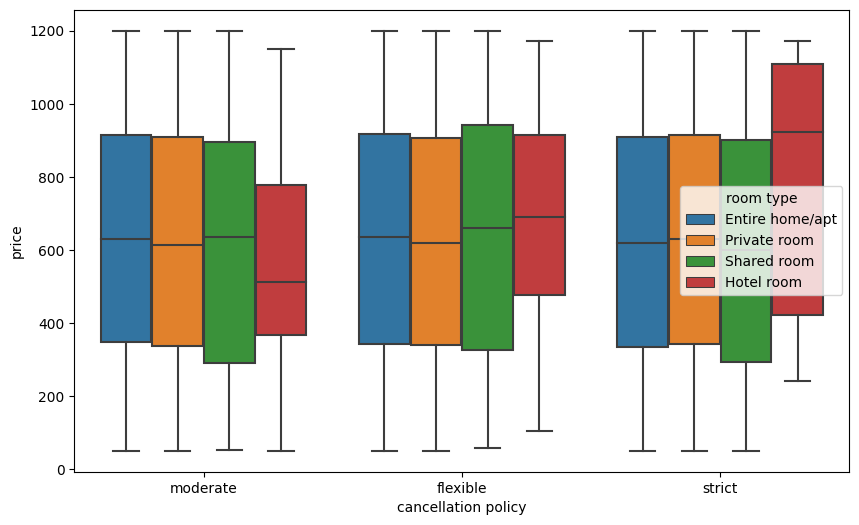

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset_cleaned, x="cancellation policy", y="price", hue = "room type")

<AxesSubplot: xlabel='neighborhood group', ylabel='price'>

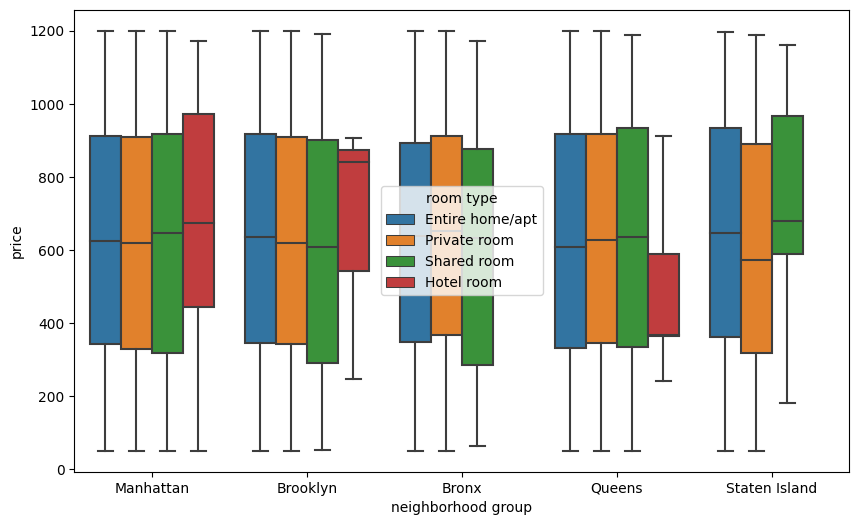

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset_cleaned, x="neighborhood group", y="price", hue = "room type")

_Answer:_
It seems that out of the above 4 pairings, `number rooms` goes very well with `room type`

#### Multivariate Analysis for Number of Rooms

<AxesSubplot: xlabel='construction year', ylabel='price'>

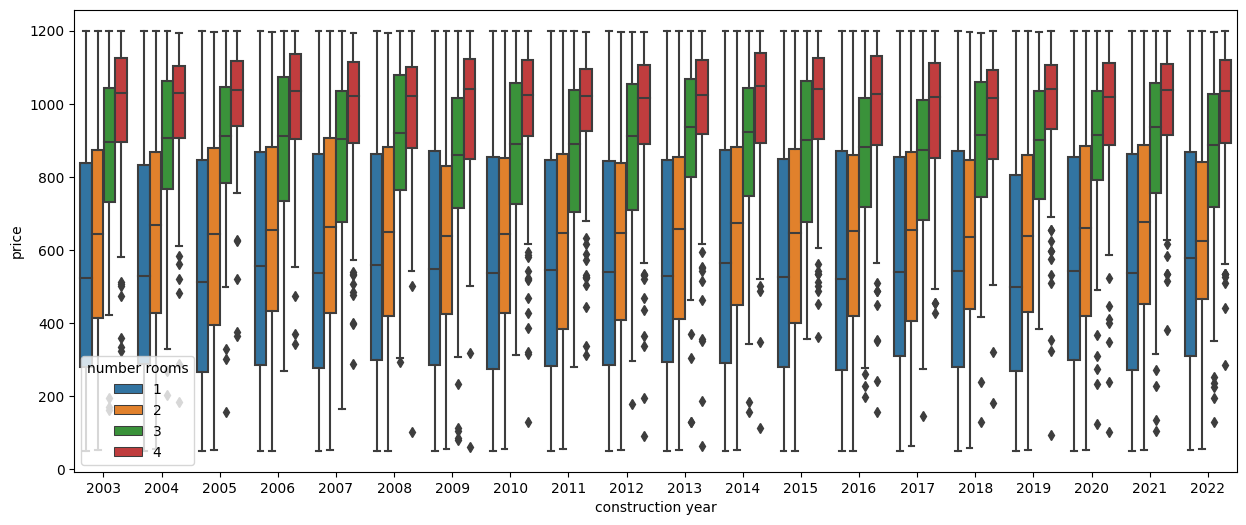

In [52]:
# Your answer goes here
plt.figure(figsize=(15,6))
sns.boxplot(data=dataset_cleaned, x="construction year", y="price", hue = "number rooms")

<AxesSubplot: xlabel='cancellation policy', ylabel='price'>

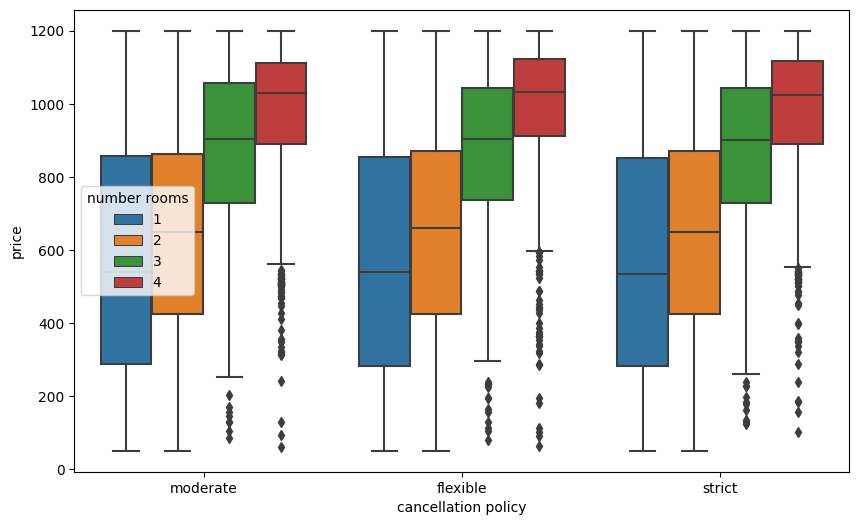

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset_cleaned, x="cancellation policy", y="price", hue = "number rooms")

<AxesSubplot: xlabel='room type', ylabel='price'>

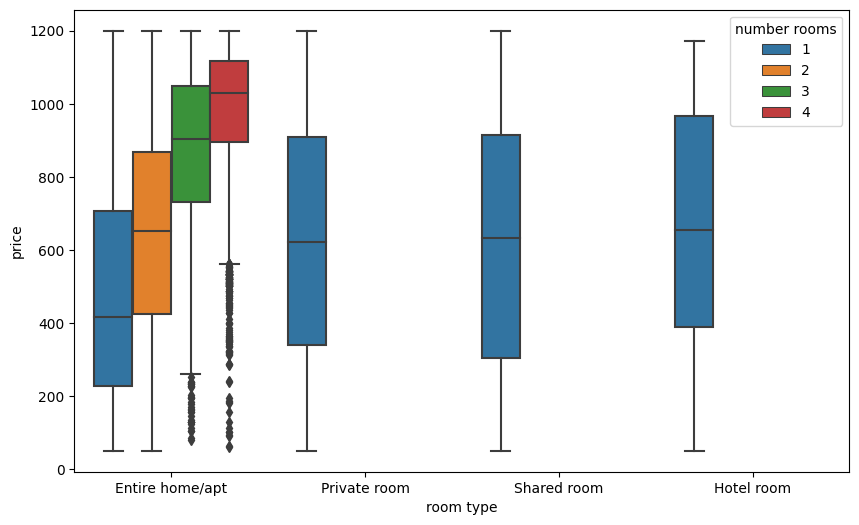

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset_cleaned, x="room type", y="price", hue = "number rooms")

<AxesSubplot: xlabel='neighborhood group', ylabel='price'>

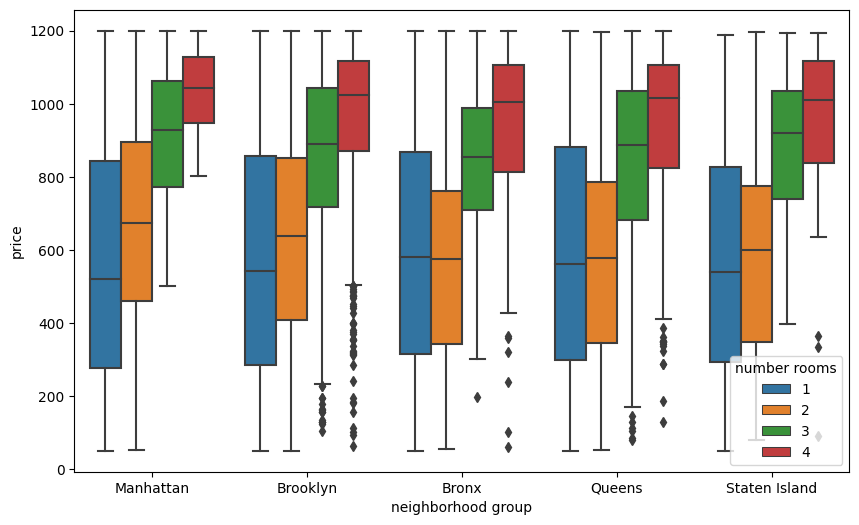

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset_cleaned, x="neighborhood group", y="price", hue = "number rooms")

_Answer:_
`number rooms` pairs equally  well with all other features.


#### Multivariate Analysis for Construction Year

<AxesSubplot: xlabel='number rooms', ylabel='price'>

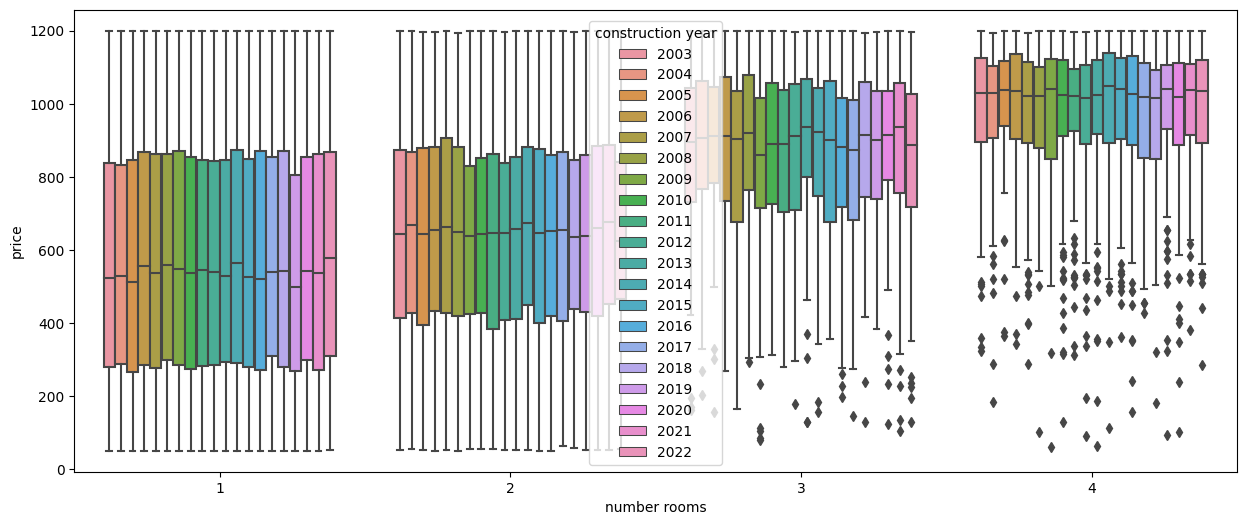

In [47]:
# Your answer goes here
plt.figure(figsize=(15,6))
sns.boxplot(data=dataset_cleaned, x="number rooms", y="price", hue = "construction year")

<AxesSubplot: xlabel='cancellation policy', ylabel='price'>

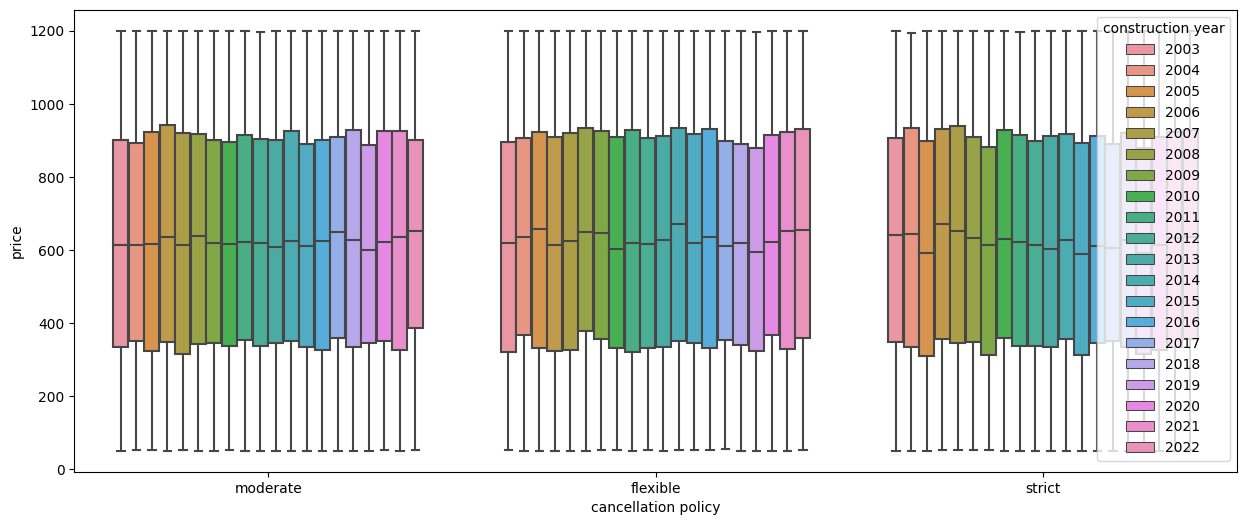

In [48]:
plt.figure(figsize=(15,6))
sns.boxplot(data=dataset_cleaned, x="cancellation policy", y="price", hue = "construction year")

<AxesSubplot: xlabel='room type', ylabel='price'>

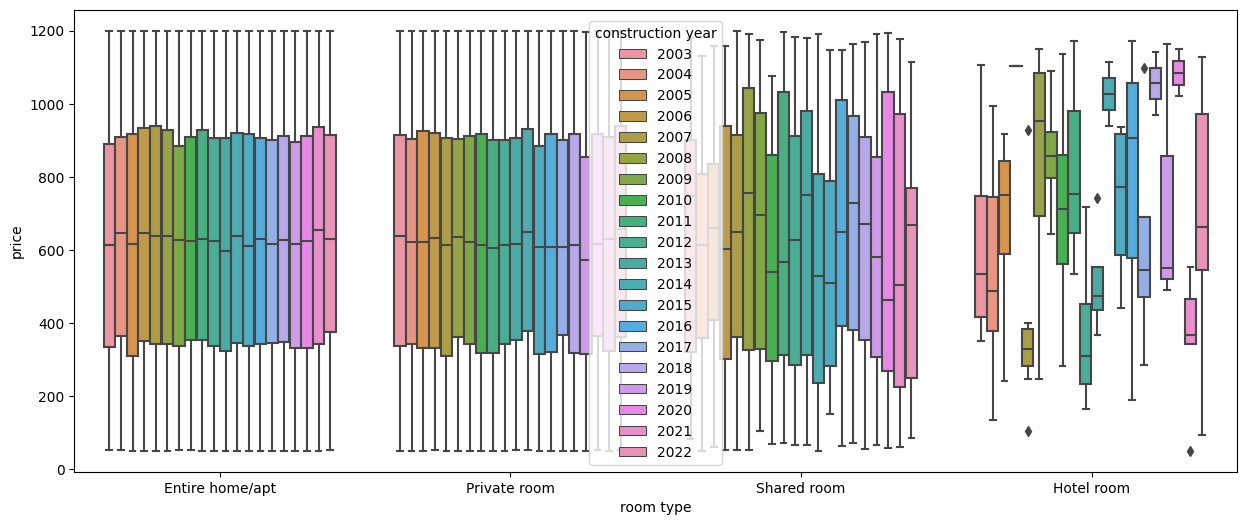

In [49]:
plt.figure(figsize=(15,6))
sns.boxplot(data=dataset_cleaned, x="room type", y="price", hue = "construction year")

<AxesSubplot: xlabel='neighborhood group', ylabel='price'>

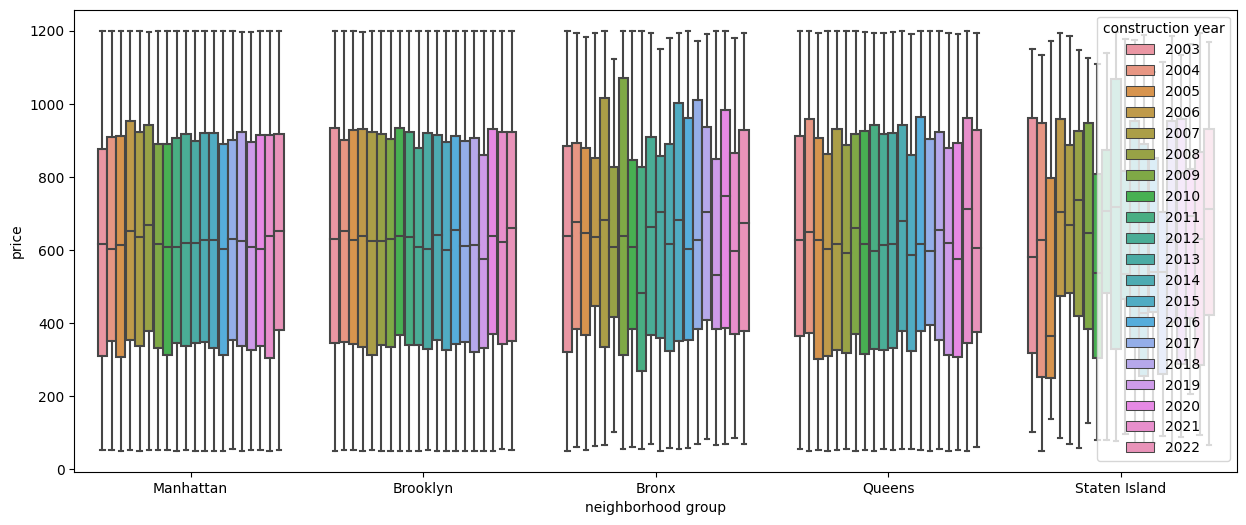

In [50]:
plt.figure(figsize=(15,6))
sns.boxplot(data=dataset_cleaned, x="neighborhood group", y="price", hue = "construction year")

_Answer:_
It seems that out of the above 4 pairings, `construction year` goes very well with `number rooms`

### Selection of Variables

Please argue: Which combinations of variables would you consider for pricing your AirBnB?

_Answer:_
`number rooms` seems to affect the price strongly. So I would select the combinations which have this feature. This would include combinations like
1. `number rooms` and `construction year`
2. `number rooms` and `room type`
3. `number rooms` and `neighborhood group`


## Question 2: Setting the Price

No matter what you have deducted from your analysis, from now on, you will continue only with three features: **The number of rooms, the neighborhood group, and the room type.**

**Enter Toby**: Toby is your long-term friend back from studying at RWTH. While you studied computer science, Toby studied business administration to become a big shot at Wall Street. He currently works in the back office of some swiss credit institute just across the corner from your office. You decide to drop by and get some of his input for your pricing decision. 

Toby proposes to first use comparables pricing to price your apartment. Comparables pricing is an established concept in economics and means that you price your apartment close to similar apartments. 
You will use different techniques to find similar apartments and set a price.

## Baseline

First, you want to set a baseline to compare against. The baseline should always use the average price of all apartments as a recommended price. Evaluate on a test set of 5%. The same test set should also be used later (you can use the random_state argument in scikit learn's train_test_split, but you need to stay consistent for different questions).

In [71]:
# Your answer goes here
import pandas as pd
dataset_cleaned = pd.read_csv("AirBnB_cleaned.csv")
dataset_cleaned = dataset_cleaned[['number rooms', 'neighborhood group', 'room type', 'price']]

In [72]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset_cleaned, train_size=0.95, random_state=101)

In [73]:
import numpy as np

baseline_price = np.mean(dataset_cleaned.price)
print(f'Baseline Price = {baseline_price}')

Baseline Price = 625.4636797380085


## Decision Tree

Using a decision tree, you try to price your apartment according to similar apartments. 

In the following, we want to know the price ranges for renting AirBnBs. To use decision trees, you need to discretize prices. We use the following price bins:


- [50, 200]
- (200, 400]
- (400, 600]
- (600, 800]
- (800, 1000]
- (1000, 1200]

We add the attribute "Price_Bins" using the discretization mentioned above for each apartment. For example, if an apartment costs 404, it is put into the bin (400, 600].

In [74]:
# Your answer goes here

bins = [49, 200, 400, 600, 800, 1000, 1200]
labels = ['[50, 200]', '(200, 400]', '(400, 600]', '(600, 800]', '(800, 1000]', '(1000, 1200]']
dataset_cleaned['Price_bins'] = pd.cut(dataset_cleaned['price'], bins=bins, labels=labels)

dataset_cleaned.head(5)

,number rooms,neighborhood group,room type,price,Price_bins
0,2,Manhattan,Entire home/apt,142,"[50, 200]"
1,1,Manhattan,Private room,620,"(600, 800]"
2,2,Brooklyn,Entire home/apt,368,"(200, 400]"
3,1,Manhattan,Entire home/apt,204,"(200, 400]"
4,1,Brooklyn,Private room,71,"[50, 200]"


Consider the extended dataset from the previous task. Use 'number rooms,' 'room type,' and 'neighborhood group' as descriptive features and "Price_Bins" as the target feature. Create a test and training set like before.

In [75]:
# Your answer goes here
# dataset_cleaned_binned = dataset_cleaned.drop('price', axis=1)
# train, test = train_test_split(dataset_cleaned_binned, train_size=0.95, random_state=69)

train, test = train_test_split(dataset_cleaned, train_size=0.95, random_state=101)

train.head(5)

,number rooms,neighborhood group,room type,price,Price_bins
66037,2,Manhattan,Entire home/apt,403,"(400, 600]"
5720,1,Brooklyn,Private room,1197,"(1000, 1200]"
22297,1,Manhattan,Shared room,288,"(200, 400]"
45441,1,Brooklyn,Private room,845,"(800, 1000]"
22647,1,Manhattan,Private room,446,"(400, 600]"


Generate a decision tree in which the minimum number of samples for splitting is ten and use entropy. What is the system's entropy?

Note: For this task, you must use the p_decision_tree library.

In [76]:
# Your answer goes here
from p_decision_tree.DecisionTree import DecisionTree

columns = train.columns

descriptive_features = columns[:-2] # Skip price and Price_bins

label = columns[-1] # Price_bins

#Converting all the columns to string
for column in columns:
    train[column]= train[column].astype(str)

data_descriptive = train[descriptive_features].values
data_label = train[label].values

print("descriptive features:")
print(descriptive_features)
print("\ntarget feature:\n" + label)

descriptive features:
Index(['number rooms', 'neighborhood group', 'room type'], dtype='object')

target feature:
Price_bins


In [77]:
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")

decisionTree.id3(0, 10)

dot = decisionTree.print_visualTree( render=True )

#print(dot)

print("System entropy: ", format(decisionTree.entropy))
print("System gini: ", format(decisionTree.gini))

System entropy:  2.5769274559859956
System gini:  None


What is the first feature the decision tree splits on?

_Answer:_  `room number`



Since it doesn't make sense to set a price range for renting a room, we need to fix a price. For simplicity, we use the means of the bins, i.e., 125, 300, 500, 700, 900, and 1100. For example, if a room were categorized in the bin (200, 400], it would have the price of 300.

What prices are possible given your decision tree for:

- Manhattan, 1-room, Private room
- Staten Island, 1-room, Shared room

_Answer:_

- Manhattan, 1-room, Private room : `500`
- Staten Island, 1-room, Shared room : `700`


What is the proposed price of the decision tree for our apartment? Store it in a variable for later usage.

In [79]:
# Your answer goes here

# We gave a 2 room apartment in Manhattan
# According to our decision tree, the price comes out to be 700 dollars

my_apartment_price_dtree = 700

To evaluate how good our decision tree is for determining price categories, we want to measure the error of the predictions on the test set. To do so, the IDS team provided you helper functions below.

In [79]:
import pydotplus
import networkx

def get_name_value_dict(graph):
    id_label_dict = {}
    root = decisionTree.root
    visited = set() # Set to keep track of visited nodes of graph.

    def dfs(visited, graph, node):#function for dfs 
        id_label_dict[node.name] = node.value
        if node not in visited:
            if node.next:
                id_label_dict[node.next.name] = node.next.value
            visited.add(node)
            if node.childs:
                for child in node.childs:
                    if child is not None:
                        dfs(visited, graph, child)
            elif node.next:
                if node.next.childs:
                    for child in node.next.childs:
                        if child is not None:
                            dfs(visited, graph, child)
    dfs(visited, decisionTree, root)
    return id_label_dict

def get_predictor(tree):
  id_label_dict = get_name_value_dict(tree)
  dotplus = pydotplus.graph_from_dot_data(tree.source)
  G = networkx.nx_pydot.from_pydot(dotplus)
  root = [n for n,d in G.in_degree() if d==0][0]
  paths = []
  for node in G:
      if G.out_degree(node)==0: #it's a leaf
          paths.append(networkx.shortest_path(G, root, node))
  new_paths = []
  for path in paths:
      for name, value in id_label_dict.items():
          path = ([p.replace(name, value) for p in path])
      new_paths.append(path)
  predictor = {}
  for path in new_paths.copy():
    target = path[-1]
    classification = tuple(path[:-1])
    predictor[classification] = target
  return predictor

def get_prediction_features(predictor):
    features = set()
    for key in predictor:
        i = 0
        while i <= len(key)-2:
            features.add(key[i])
            i +=2
    return features
            
def get_predicted_bin(instance, features, predictor):
  feature_values = {}
  for feature in features:
      feature_values[feature] = instance[feature]
  possible_paths = predictor.keys()
  i=0
  while i<=len(feature_values):
    attribute = [path[i] for path in possible_paths][0]
    if attribute in predictor.values():
      break
    feature_value = feature_values[attribute]
    candidates = []
    for el in possible_paths:
      if str(el[i+1]) == str(feature_value):
        candidates.append(el)
    possible_paths = candidates.copy()
    i+=2
  return predictor[possible_paths[0]]



### Dot is your visual decision tree. Adjust the naming if needed
predictor = get_predictor(dot)
features = get_prediction_features(predictor)

To predict the price bin for each instance of your test set, apply the function get_predicted_bin using the variables *predictor* and *features* provided above.

In [83]:
# Your answer goes here
predictions = test.apply(get_predicted_bin, args=(features, predictor), axis=1)

results = pd.concat([test, predictions], axis=1)

#TO-DO: Rename the 0 column with something meaningful
# results.rename(columns={"0": "Predictions"})

def get_predicted_value(data_row):
    switch={
      "(50, 200]": 125,
      "(200, 400]": 300,
      "(400, 600]": 500,
      "(600, 800]": 700,
      "(800, 1000]": 900,
      "(1000, 1200]": 1100,
      }
    return switch.get(data_row[0],"Invalid input")


results = results.assign(predicted_price = results.apply(get_predicted_value, axis=1))

results.head()

,number rooms,neighborhood group,room type,price,Price_bins,0,predicted_price
68569,2,Manhattan,Entire home/apt,811,"(800, 1000]","(600, 800]",700
20769,3,Brooklyn,Entire home/apt,1184,"(1000, 1200]","(800, 1000]",900
896,1,Manhattan,Entire home/apt,1197,"(1000, 1200]","(200, 400]",300
1002,3,Manhattan,Entire home/apt,596,"(400, 600]","(1000, 1200]",1100
6323,1,Manhattan,Private room,81,"[50, 200]","(400, 600]",500


You predicted a price range for AirBnBs in your test set. However, since you cannot enter a price range for renting an apartment, we have to map the range of bins to one value. To do so, we use the mean of bins, as explained before, to predict the price. Given that, compute the mean absolute error between the prediction from the decision tree and the real price provided in the dataset. What is the mean absolute error?

In [85]:
# Your answer goes here
errors = [abs(pred - act) for pred, act in zip(results['predicted_price'], results['price'])]

mean_abs_error = np.mean(errors)

print(f"Mean absolute error: {mean_abs_error}")


Mean absolute error: 271.95738075077617


## Clustering

Another way to do comparables pricing is to find similar apartments using clustering. Each calculated cluster represents one or more similar apartments in the dataset. For each cluster, you calculate the mean price as a representative price. To predict the price for new apartments, you assign them to an existing cluster and give the mean price as prediction.

Use the same features you used in the decision tree for the clustering as well (**number rooms, neighborhood group, room type**), and remember that your dataset is still split into a training and test set.

In this task, you will use the k-means algorithm.
*Note: To keep results comparable, please use 100 for random state and n_init when initializing the clustering algorithm. Also, remember to use the same test and training set as in the previous tasks to compare performances.*

### Encoding 

K-means tries to calculate the distance between different data points. Since some of the features you want to use are not numeric, apply one-hot encoding to be able to use distance measures. Use the preprocessing module of sklearn to prepare your dataset for clustering.

In [65]:
# Your answer goes here
import pandas as pd

dataset_cleaned = pd.read_csv("AirBnB_cleaned.csv")
dataset_cleaned = dataset_cleaned[['number rooms', 'neighborhood group', 'room type', 'price']]
print("Dataset Shape:", dataset_cleaned.shape)


# Splitting into Train, Test
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset_cleaned, train_size=0.95, random_state=101)

print("Train Shape:",train.shape)
print("Test Shape:",test.shape)


#Splitting into X, Y
X_train = train[['number rooms', 'neighborhood group', 'room type']]
Y_train = train['price']
X_test = test[['number rooms', 'neighborhood group', 'room type']]
Y_test = test['price']

# print("X Train Shape:",X_train.shape)
# print("X Test Shape:",X_test.shape)
# print("Y Train Shape:",Y_train.shape)
# print("Y Test Shape:",Y_test.shape)

Dataset Shape: (70842, 4)
Train Shape: (67299, 4)
Test Shape: (3543, 4)


In [67]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

# preprocess the dataset
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

# split categorical vs numerical columns
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)

# create a preprocess that can handle both categorical and numeric data
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

preprocessor.fit(X_train)
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# print("X Train Preprocessed Shape:", X_train_preprocessed.shape)
# print("X Test Preprocessed Shape:", X_train_preprocessed.shape)

X Train Preprocessed Shape: (67299, 10)
X Test Preprocessed Shape: (67299, 10)


### Choosing number of clusters

In k-means, the number of wanted clusters is a parameter one can decide on. Since this is information you do not have at this time, you choose to use the data to decide.

You cluster on the training dataset by using `k` number of clusters where `k` is between 4 and 15. Since you are interested in the price, for each clustering, you calculate the **standard deviation of the mean prices for the clusters**. Therefore, for each clustering:
1. Calculate the mean price for each of the resulting clusters.
2. Calculate the standard deviation of the mean prices calculated in 1.

Plot a diagram where on the `x-axis` you will have the *number of clusters used* and on the `y-axis` the *standard deviation of the means*.

In your opinion, which amount of clusters makes more sense? Explain your answer.

In [68]:
# Your answer goes here
from sklearn.cluster import KMeans
import numpy as np

num_clusters_list = []
price_std_for_clusters = []

# For each num of cluster from 4 to 15, get std of the mean price of each cluster
for num_of_clusters in range(4, 16):
    # Make a model and do clustering
    model = KMeans(n_clusters=num_of_clusters, n_init = 100, random_state=100)
    model.fit(X_train_preprocessed, Y_train)

    # Get cluster labels for the training data and zip it with prices
    cluster_labels = model.predict(X_train_preprocessed)
    prices_with_clusters = pd.concat([Y_train, pd.DataFrame(cluster_labels, columns = ['cluster label'])], axis=1)

    # Group the prices according to cluster label
    data_by_cluster = prices_with_clusters.groupby('cluster label')

    # Calculate the average price of each cluster
    mean_price_by_cluster = data_by_cluster['price'].mean()

    # Get std for cluster mean prices and append them to list
    prices_per_cluster = [price for price in mean_price_by_cluster.items()]
    num_clusters_list.append(num_of_clusters)
    price_std_for_clusters.append(np.std(prices_per_cluster))

print(num_clusters_list)
print(price_std_for_clusters)


[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[311.74876389610375, 311.5820051867067, 311.366169269892, 311.0474581230119, 310.6730297302509, 310.23259585907425, 310.0989419199058, 309.90896373839877, 309.84978560912015, 309.4669815367846, 309.1713349253057, 308.6232426614536]


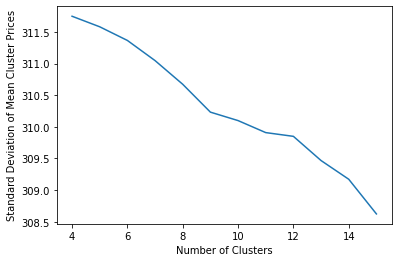

In [69]:
# Plot std

import matplotlib.pyplot as plt

plt.plot(num_clusters_list, price_std_for_clusters)
plt.xlabel('Number of Clusters')
plt.ylabel('Standard Deviation of Mean Cluster Prices')
plt.show()

_Answer:_

For the clustering to be effective, we would want the data to be as seperated as possible. This would mean the highest possible standard deviation across the means of the different clusters. We see that having `4` clusters gives the highest standard deviation. Therefore, we should choose 4 clusters.



**Note:** No matter the conclusion made in the previous task, from now on, you use the clustering model with **9 clusters** for predicting the price for your apartment and evaluating the clustering technique.

### Pricing your apartment

To predict the price for your apartment, calculate in which cluster your apartment would be and use the mean value of the cluster as a possible price.

In [70]:
# Your answer goes here
# cluster for 9 clusters

# Make a model and do clustering
model_9clusters = KMeans(n_clusters=9, n_init = 100, random_state=100)
model_9clusters.fit(X_train_preprocessed, Y_train)

# Get cluster labels for the training data and zip it with prices
cluster_labels = model_9clusters.predict(X_train_preprocessed)
prices_with_clusters = pd.concat([Y_train, pd.DataFrame(cluster_labels, columns = ['cluster label'])], axis=1)

# Group the prices according to cluster label
data_by_cluster = prices_with_clusters.groupby('cluster label')

# Calculate the average price of each cluster
mean_price_by_cluster = data_by_cluster['price'].mean()

cluster_mean_price_list = [price for cluster, price in mean_price_by_cluster.items()]
print(cluster_mean_price_list)

[627.4351158038147, 624.8586619406292, 624.8182416317131, 625.3749157871098, 629.8554577464789, 618.5710204081632, 622.7366529090667, 625.2067739520958, 621.0903099394371]


In [77]:
print(X_test.head())

       number rooms neighborhood group        room type
68569             2          Manhattan  Entire home/apt
20769             3           Brooklyn  Entire home/apt
896               1          Manhattan  Entire home/apt
1002              3          Manhattan  Entire home/apt
6323              1          Manhattan     Private room


In [83]:
# Predict the price of our apartment using above model
# 2-room apartment, Manhattan, Entire home/apt
print(X_test.head(1)) #An apartment with similar features is found at the first row (0th index) of X_test

cluster_labels_test = model_9clusters.predict(X_test_preprocessed)
my_apartment_price_clustering = cluster_mean_price_list[cluster_labels_test[0]]

print(f"Price of my apartment: {round(my_apartment_price_clustering, 2)}")



       number rooms neighborhood group        room type
68569             2          Manhattan  Entire home/apt
Price of my apartment: 622.74


### Evaluating clustering

You want to evaluate how well your clustering worked. In your case, two things can be evaluated:

1.   Whether the clustering technique can group similar apartments together
2.   Whether other people determine the price of their apartment as you did, meaning whether similar apartments get a similar price

You are going to evaluate the clustering technique visually. The IDS team provides you with the following fancy code that reduces your input to two dimensions.

In [84]:
import umap.umap_ as umap
import sklearn

#Preprocessing numerical
full_data = X_train # use the train dataset here
numerical = full_data.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = sklearn.preprocessing.PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,
                                                fit1._initial_alpha, fit1._a, fit1._b,
                                                fit1.repulsion_strength, fit1.negative_sample_rate,
                                                200, 'random', np.random, fit1.metric,
                                                fit1._metric_kwds, False, {}, False)

# Extracting the resulting dimensions
dimension1 = embedding[0].T[0]
dimension2 = embedding[0].T[1]

c:\Users\DELL\anaconda3\envs\env-IDS2022-23\lib\site-packages\umap\umap_.py:1802: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  warn(


Create a scatter plot from the two dimensions and use the cluster labels for coloring the data points. Use the train set for the visualization. Discuss the result.

In [85]:
# Your answer goes here
import seaborn as sns

plot_data = pd.concat([pd.DataFrame(dimension1), pd.DataFrame(dimension2), pd.DataFrame(cluster_labels)], axis=1)
plot_data.columns = ['Dimension 1', "Dimension 2", "cluster_labels"]
plot_data.head(5)

,Dimension 1,Dimension 2,cluster_labels
0,13.820106,2.004185,6
1,8.346117,14.952911,2
2,1.901523,23.889215,0
3,8.776733,14.144978,2
4,6.523332,-7.585107,0


<AxesSubplot: xlabel='Dimension 1', ylabel='Dimension 2'>

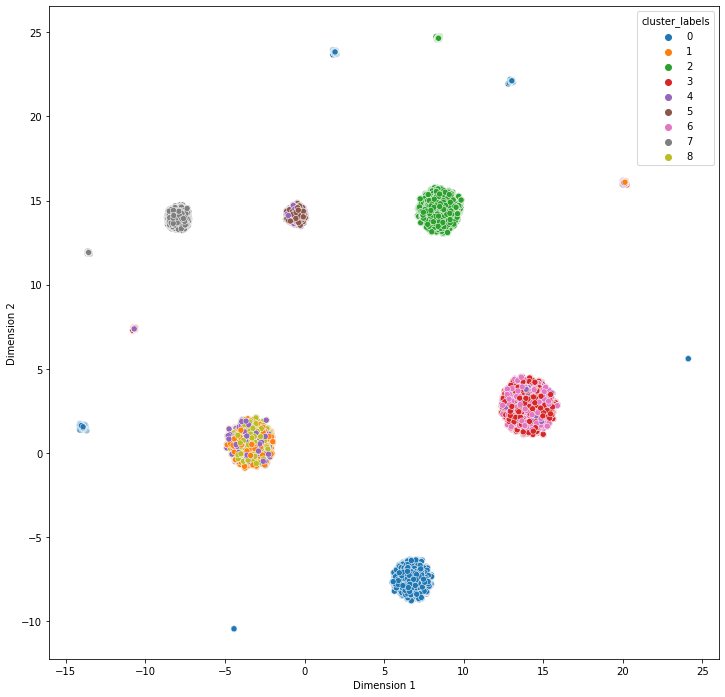

In [86]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=plot_data, x="Dimension 1", y="Dimension 2", hue=plot_data.cluster_labels, palette="tab10")

_Answer:_

There are at least `6` well formed clusters and a few outliers. On cursory analysis, it seems that one can estimate the price of their apartment pretry accurately

We next evaluate whether similar apartments (considering the attributes we chose) get similar prices. To do this, we use our test set. Assign each apartment of the test set to the nearest centroid. Predict the price of the apartments in the test set by taking the mean price of the cluster they was assigned to. Calculate the mean absolute error between the predicted and real prices.

In [93]:
# Your answer goes here
Y_test_cluster_labeled = pd.DataFrame({"price": Y_test.tolist(), "cluster_label": cluster_labels_test})

def calculate_price_from_cluster(row):
    cl = row['cluster_label']
    return cluster_mean_price_list[int(cl)]
    

Y_test_cluster_labeled = Y_test_cluster_labeled.assign(predicted_price=Y_test_cluster_labeled.apply(calculate_price_from_cluster, axis=1))

Y_test_cluster_labeled.head(5)


,price,cluster_label,predicted_price
0,811,6,622.736653
1,1184,4,629.855458
2,1197,3,625.374916
3,596,6,622.736653
4,81,0,627.435116


In [94]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test_cluster_labeled['price'], Y_test_cluster_labeled['predicted_price'])

print(f'Mean Absolute Error(Clustering): {mae}')

Mean Absolute Error(Clustering): 289.56966502589637


### Final comments on the price prediction

Please compare the three approaches used for determining the price. Do they provide a good way of determining the price?

_Answer:_

The MAEs for the two methods were <br>
`MAE(Decision Tree) : 271`<br>
`MAE(Clustering) : 289`<br>
Therefore, out of the two, Decision Tree method performed better. However the error margins are still very bad.


## Question 3: Investigating Price Elasticity

You show your results to Toby, excited about the price suggestions you got from the decision tree and clustering. You decide to take the higher price, which naturally means more income.

However, he points you to one central flaw in your thinking: The number of bookings is not independent of the price. Therefore, you can not just take any price and assume that this will lead to more income than a lower price, as the demand (utilization) for your apartment might decrease. This is called **price elasticity**.

You want to verify what Toby has been telling you. You extracted the utilization column of your dataset by grabbing the available data from AirBnB's calendar (smart!). The utilization values are contained in dataset **AirBnB_utilization.csv**. **Show several graphs investigating price elasticity.** For example, you might plot the utilization in relation to the price and color according to different variable values. 
After you have verified Toby's statements, you want to learn price elasticity from the dataset (the utilization of an apartment given the price, the number of rooms, the room type, and the neighborhood group, i.e., the same features as before). With the learned price elasticity, you want to evaluate which of the proposed prices (decision tree or clustering) is the better choice.

In [ ]:
# Your answer goes here


You will investigate the relationship between price and utilization in this subtask. First, you will train different models and choose the one that best predicts utilization for an apartment. Second, you will evaluate which of the proposed prices of decision tree and clustering prices were better, assuming that your model provides the correct utilization. Third, you will conclude your investigation and provide a pricing decision.

### Learning price elasticity
You want to use different supervised learning techniques to learn price elasticity. You decide on linear regression, SVM, and multilayer perceptrons. However, you have to preprocess the data. Use the features of the neighborhood group, the room type, the number of rooms, and the price to predict the utilization. Split into training and testing data (test size 5%).

Prepare the data set by splitting, one-hot encoding, and normalizing.

In [ ]:
# Your answer goes here


For each technique, use 5-cross-fold validation and assess the performance on the test set. 

#### Regression

Learn a linear regression to predict the utilization of an AirBnB.

In [ ]:
# Your answer goes here


What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here


Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here


#### Linear SVR

Train and evaluate a Linear SVR (Support Vector Regression) model.

In [ ]:
# Your answer goes here


What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here


Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here


#### Learning Non-Linear Relationships

You realize that learning linear relationships only provides limited performance. You want to learn non-linear relationships. First, you will learn non-linear relationships using linear regression and kernels. Second, you will use non-linear kernels in the Support Vector Regression. Third, you will use neural networks.

#### Kernels in Regression

Use a transformation of the price and a regression to incorporate non-linear relationships, as learned in the lecture. You can try different kernel functions, but at least you should use one quadratic kernel.

In [ ]:
# Your answer goes here


What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here


Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here


#### Kernels in SVR

Train and evaluate an SVR (Support Vector Regression) model with different, non-linear kernels. You can limit the size of your training set to 25000 samples to make the problem feasible in computation time.

In [ ]:
# Your answer goes here


What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here


Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here


What is your conclusion on using kernels?

_Answer:_



#### Neural Network

Learn a neural network (multilayer perceptron) to predict the utilization of an AirBnB.

In [ ]:
# Your answer goes here


What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here


Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here


### Profit discrepencies when incorporating price elasticity

Use the model that best captures price elasticity on the testing set. You can assume that this model accurately captures price elasticity, i.e., is the ground truth. What is the better of the two proposed prices? Is the better price the optimal price?

In [ ]:
# Your answer goes here


_Answer:_



# Question 4: Conclusion

Summarize your findings and discuss limitations.

_Answer:_ 

